In [294]:
# Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# wget

In [295]:

# # 1.
# data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

# # 2. Linux or cmd
# # The below is for Linux
# # !wget $data -o CaliHousing.csv 


# # 2. For windows
# # wget for windows is below. It fetches teh data and saves to csv locally
# !python -m wget $data -o CaliHousing.csv

# pip install wget, incase

In [296]:
# !pip install wget

# Reading file after wget from locally saved file

In [297]:
# Now reading the file received from wget into a dataframe

df= pd.read_csv('CaliHousing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# OR Directly reading file

In [298]:
df1=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [299]:
# Names of columns

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [300]:
# Data Types of the columns

df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [301]:
# Checking for missing values

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Data Preparation

In [302]:
# Select only the features from above and fill in the missing values with 0.

df["total_bedrooms"] = df["total_bedrooms"].fillna(0)

In [303]:
# Creating new columns

df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]
df["population_per_household"]

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Name: population_per_household, Length: 20640, dtype: float64

# Make median_house_value binary

In [304]:
# We need to turn the median_house_value variable from numeric into binary.
# Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

df["above_average"] = np.where(df["median_house_value"] >= df["median_house_value"].mean(), 1, 0)
df["above_average"]

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: above_average, Length: 20640, dtype: int32

## Question 1:

In [305]:
# Question 1: What is the most frequent observation (mode) for the column ocean_proximity?
df["ocean_proximity"].mode()

# Ans: <1H OCEAN

0    <1H OCEAN
Name: ocean_proximity, dtype: object

# Split the Data

In [306]:
# Splitting the data train/val/test, with 60-20-20 distribution
# Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
# Make sure that the target value (median_house_value) is not in your dataframe.


from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Check size of the datasets
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [307]:
# Indices are all messed up. Although not needed, indices will be reset

df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1H OCEAN,3.922460,0.259714,3.754011,1
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,NEAR OCEAN,7.564516,0.130228,2.789082,1
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,INLAND,3.908012,0.234624,2.540059,0
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1H OCEAN,5.201093,0.194158,2.059016,1
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,NEAR OCEAN,7.010127,0.139762,2.516456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,154200.0,<1H OCEAN,3.748996,0.305838,1.909639,0
16339,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,146400.0,INLAND,5.720486,0.171472,3.956597,0
14965,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,215300.0,<1H OCEAN,5.549834,0.182879,3.242525,1
11117,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,139000.0,<1H OCEAN,4.414286,0.229126,2.085714,0


In [308]:
# Reset index

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1H OCEAN,3.922460,0.259714,3.754011,1
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,NEAR OCEAN,7.564516,0.130228,2.789082,1
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,INLAND,3.908012,0.234624,2.540059,0
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1H OCEAN,5.201093,0.194158,2.059016,1
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,NEAR OCEAN,7.010127,0.139762,2.516456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,154200.0,<1H OCEAN,3.748996,0.305838,1.909639,0
12380,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,146400.0,INLAND,5.720486,0.171472,3.956597,0
12381,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,215300.0,<1H OCEAN,5.549834,0.182879,3.242525,1
12382,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,139000.0,<1H OCEAN,4.414286,0.229126,2.085714,0


In [309]:
# Setting the target variable

target = 'above_average' 

In [310]:
# Setting the y-variable

y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

y_train

array([1, 1, 0, ..., 1, 0, 0])

In [311]:
# Dropping the target variable from original dataframe since y-variable is set

del df_train[target]
del df_val[target]
del df_test[target]

In [312]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [313]:
# Just for fun, checking ocean_proximy value counts, and percentage

df_full_train["ocean_proximity"].value_counts()

<1H OCEAN     7341
INLAND        5227
NEAR OCEAN    2086
NEAR BAY      1854
ISLAND           4
Name: ocean_proximity, dtype: int64

In [314]:
# Just for fun, checking ocean_proximy value counts percentage

df_full_train["ocean_proximity"].value_counts(normalize=True)

<1H OCEAN     0.444586
INLAND        0.316558
NEAR OCEAN    0.126332
NEAR BAY      0.112282
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

## Question 2:

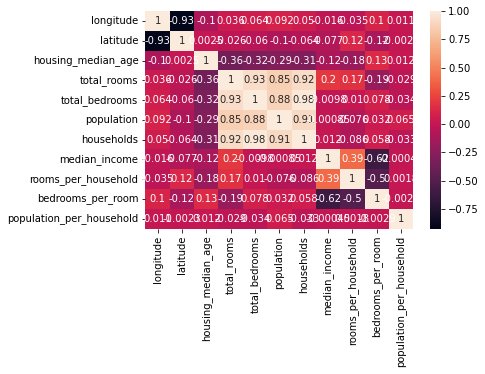

In [315]:
# Question 2: 

# Create the correlation matrix for the numerical features of your train dataset.
# In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
# What are the two features that have the biggest correlation in this dataset?



# Separating features into numerical and categorical

numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

categorical = ['ocean_proximity']

# Correlation Matrix

import seaborn as sns

df_num = pd.DataFrame(df_train,columns=numerical)

corrMatrix = df_num.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()



In [316]:
df_num.corr()

# Ans: total_bedrooms and households

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925005,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
latitude,-0.925005,1.000000,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
housing_median_age,-0.099812,0.002477,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,0.036449,-0.025914,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,0.063840,-0.059730,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,0.091670,-0.100272,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,0.049762,-0.063529,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.085832,0.058004,-0.032522
median_income,-0.016426,-0.076805,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.394154,-0.616617,-0.000454
rooms_per_household,-0.034814,0.119118,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,1.000000,-0.500589,0.001801
bedrooms_per_room,0.102320,-0.124507,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.500589,1.000000,-0.002851


# Question 3:

In [317]:
# Question 3: 

# Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
# What is the value of mutual information?
# Round it to 2 decimal digits using round(score, 2)

from sklearn.metrics import mutual_info_score

mutual_info_score(df_full_train['ocean_proximity'], df_full_train['above_average'])

# Ans: 0.101

0.1019224615118327

# Question 4:

In [318]:
# Question 4:

# Now let's train a logistic regression
# Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
# Fit the model on the training dataset.
# To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
# model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
# Calculate the accuracy on the validation dataset and round it to 2 decimal digits.



## ONE HOT ENCODING

In [319]:
# We use dictvectorizer, as it will leave the numerical columns as is and not change them for one hot encoding

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [320]:
# Feature names

dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [321]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [322]:
model.intercept_[0]

-0.13173447259710186

In [323]:
model.coef_[0].round(3)

array([ 0.341,  0.004,  0.036,  0.13 ,  0.092,  1.216,  0.475, -1.762,
        0.035,  0.229,  0.891, -0.002,  0.01 , -0.01 ,  0.002, -0.   ])

In [324]:
y_pred = model.predict(X_val)

In [325]:
priceavg_decision = (y_pred >= 0.5)

In [332]:
# accuracy = round(((y_val == priceavg_decision).mean()),2)

# accuracy

accuracy = accuracy_score(y_val, y_pred)
print(round(accuracy,2))

accuracy

# Ans: 0.84

0.83


0.8338178294573644

# Question 5:

In [327]:
# Let's find the least useful feature using the feature elimination technique.
# Train a model with all these features (using the same parameters as in Q4).
# Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
# For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [328]:
print(numerical)
test=numerical.copy()
test.remove("latitude")
print(test)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
['longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']


In [329]:
feat_test=['total_rooms', 'total_bedrooms', 'population', 'households']

diff_acc=[]

orig_score = accuracy

for feat in feat_test:
    
    df_train_feat=df_train.drop([feat], axis=1)
    df_val_feat=df_val.drop([feat], axis=1)
    
    numerical_feat=numerical.copy()
    numerical_feat.remove(feat)
    
    train_dict = df_train_feat[categorical + numerical_feat].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val_feat[categorical + numerical_feat].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    print(feat, orig_score - score, score)
 

# Ans: total_rooms

total_rooms 0.0002422480620154488 0.8362403100775194
total_bedrooms -0.00024224806201555982 0.8367248062015504
population 0.01017441860465118 0.8263081395348837
households 0.002664728682170492 0.8338178294573644


# Question 6

In [333]:
# For this question, we'll see how to use a linear regression model from Scikit-Learn
# We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
# Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
# This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
# Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [335]:
# One Hot Encoding

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [339]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alphas = [0, 0.01, 0.1, 1, 10]

for a in alphas:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    print(a, round(score, 11))
    
# Ans: 0

0 0.45352644257
0.01 0.45352644258
0.1 0.45352644266
1 0.45352644348
10 0.45352645169
